In [1]:
# kütüphaneleri import edelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pythonda uyarıları kapatır
import warnings
warnings.filterwarnings("ignore")

In [2]:
# veriyi içe aktar
data = pd.read_csv("olimpiyatlar.csv")
data.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


* Olimpiyat Oyunları, Yaz ve Kış Olimpiyat Oyunları olmak üzere iki ayrı kategoride, dört yılda bir düzenlenen uluslararası çok sporlu bir etkinliktir.

* Bu Veri Seti, Atina 1896'dan Rio 2016'ya kadar tüm oyunlar da dahil olmak üzere modern Olimpiyat Oyunlarına ilişkin tarihsel bir veri kümesidir.

* Veri seti içerisinde bulunan sütunların isimleri ve açıklamaları:
    1. ID - Her sporcu için benzersiz numara
    1. Name - Sporcunun ismi
    1. Gender - Cinsiyet: M(Erkek) - F(Kadın)
    1. Age - Yaş
    1. Height - Boy (santimetre)
    1. Weight - Ağırlık (Kilogram)
    1. Team - Takım ismi
    1. NOC - Ulusal Olimpiyat Komitesi 3 harfli kod
    1. Games - Yıl ve sezon
    1. Year - Yıl
    1. Season - Sezon: Yaz ya da Kış
    1. City - Düzenlenen Şehir
    1. Sport - Spor
    1. Event - Etkinlik
    1. Medal - Madalya: Altın, Gümüş, Bronz ve Madalya Yok

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB



* .info() veri içerisinde bulunan her bir sütun içerisinde kaç adet örnek var, bu verilerin veri tipleri nedir ve veri tiplerinin tüm veri içerisinde dağılımı nedir gibi veriyi tanımak için gerekli temel soruları cevaplar.


In [4]:
# veri içerisinde bulunan sütunları listeyelim.
data.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
# sütun isimlerinin değiştirilmesi
data.rename(columns={'ID'    : 'id', 
                     'Name'  : 'isim', 
                     'Gender': 'cinsiyet', 
                     'Age'   : 'yas', 
                     'Height': 'boy', 
                     'Weight': 'kilo', 
                     'Team'  : 'takim', 
                     'NOC'   : 'noc', 
                     'Games' : 'oyunlar',
                     'Year'  : 'yil', 
                     'Season': 'sezon', 
                     'City'  : 'sehir',
                     'Sport' : 'spor',
                     'Event' : 'etkinlik',
                     'Medal' : 'madalya'}, inplace=True)       # inplace = True kalıcı değişiklik sağlar

Yararsız Verinin Çıkarılması ve Düzenlenmesi
* id sütunu veri hakkında herhangi bir bilgi vermediği için çıkarılacaktır.
* oyunlar sütunu yıl ve sezon sütunlarının birleşimi olduğu için yararsız veri olarak kabul edilir ve çıkarılabilir.

In [6]:
# drop metodu ile id ve oyunlar'ı çıkaralım
data = data.drop(["id", "oyunlar"], axis = 1) # axis = 1 sütunları çıkart demek
data.head()

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Kayıp Veri
* Kayıp veri kavramı veri içerisinde bulunan örneğin herhangi bir sütununda bulunan değerin olmaması anlamına gelir. 
* Mesela, aşağıda bulunan veride ikinci index'te bulunan örneğin boy ve kilo sütunlarında NaN (Not a Number) yazmaktadır. Bu NaN yazısı örneğe ait boy ve kilo verisinin olmadığı ya da kayıp olduğu anlamına gelir.

In [7]:
data.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [8]:
# veri setinde ki eksik verilerimize bakalım
data.isnull().sum()

isim             0
cinsiyet         0
yas           9474
boy          60171
kilo         62875
takim            0
noc              0
yil              0
sezon            0
sehir            0
spor             0
etkinlik         0
madalya     231333
dtype: int64

* Kayıp veri ile mücadele etmek için,
    1. Kayıp veriye ait örnekler veriden çıkarılabilir.
    1. Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama ya da medyan değerlerine göre doldurulabilir.
* Bu veri üzerinde çalışma yaparken, 
    1. Boy ve kilo sütununda bulunan kayıp veriyiyi etkinlik ortalamasına göre dolduracağız.
    1. Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.
    1. Madalya alamayan sporcuları veri setinden çıkaracağız.

#### Boy ve Kilo Sütunu Kayıp Veri Doldurma
* Boy ve kilo sütununda bulunan kayıp veriyiyi etkinlik ortalamasına göre dolduracağız.

In [9]:
len(data.etkinlik.unique())     # toplam eşsiz etkinlik sayısı

765

In [10]:
etkinlik_unique = pd.unique(data.etkinlik)      # eşsiz etkinlikleri değişkene atadık  
etkinlik_unique[:10]

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [11]:
# her bir etkinliği iteratif olarak dolaş
# etkinlik özelinde boy ve kilo ortalamalarını bul
# etkinlik özelinde boy ve kilo da kayıp olan değerlere ortalama boy ve kilo değerlerini eşitle

boy_kilo_liste = ["boy", "kilo"]
for i in etkinlik_unique:           # etkinlik listesi içerisinde dolaş
    
    # etkinlik filtresi oluştur
    etkinlik_filtre = data.etkinlik == i       # her bir etkinlik bir değişkene atanacak
    # veriyi etkinliğe göre filtrele
    veri_filtre= data[etkinlik_filtre]
    
    # boy ve kilo için ayrı ayrı etkinlik özelinde ortalama bulma
    for j in boy_kilo_liste:
        
        ortalama = np.round(np.mean(veri_filtre[j]),2)       # burda tek bir etkinlik için sırayla boy ve kilo ort. tutulacak
        
        if ~np.isnan(ortalama): # eğer etkinlik özelinde ortalama varsa
            veri_filtre[j] = veri_filtre[j].fillna(ortalama)
        
        else: # etkinlik özelinde ortalama yoksa tüm veri için ortalama bul (yani nan değerden dolayı ortalama alınamadıysa)
            tum_veri_ortalamasi = np.round(np.mean(data[j]),2)            
            veri_filtre[j] = veri_filtre[j].fillna(tum_veri_ortalamasi)
    # etkinlik özelinde kayıp değerleri doldurulmuş veriyi ana veride eşitle           
    data[etkinlik_filtre] = veri_filtre

In [12]:
data.isnull().sum()         # yukarıda ki aşama itibariyle boy ve kilo eksik değerler dolduruldu

isim             0
cinsiyet         0
yas           9474
boy              0
kilo             0
takim            0
noc              0
yil              0
sezon            0
sehir            0
spor             0
etkinlik         0
madalya     231333
dtype: int64

#### Yaş Sütunu Kayıp Veri Doldurma
* Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.

In [13]:
yas_ortalamasi = np.round(np.mean(data.yas),2)
print("Yaş ortlaması: {}".format(yas_ortalamasi))
data["yas"] = data["yas"].fillna(yas_ortalamasi)
data.info()

Yaş ortlaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   noc       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


#### Madalya Alamayan Sporcuları Veri Setinden Çıkarma
* Madalya alamayan sporcuları veri setinden çıkaracağız.

In [14]:
# toplamda 231333 tane örnek için madalya değişkeni tanımlı değil
madalya_degiskeni = data["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [15]:
# madalya değişkeni tanımlı olmayan örnekleri(NaN) bulup tilda işareti ile tersini alalım
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [16]:
data = data[madalya_degiskeni_filtresi]      # verimiz sadece madalya sütunu dolu olan satırlardan oluşuyor
data.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   noc       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [18]:
# İstersek verinin bu son halini yeni bir csv dosyasına kaydedebiliriz
# data.to_csv("olimpiyatlar_temizlenmis.csv", index=False)

<a id='3'></a>
## Tek Değişkenli Veri Analizi
Bu bölümde veri içerisinde bulunan sayısal ve kategorik verilerin tek tek incelemesini yapacağız.
* Sayısal Değişkenler:
    1. yas   
    1. boy
    1. kilo
    1. yil
* Kategorik Değişkenler:
    1. isim
    1. cinsiyet
    1. takim
    1. noc
    1. sezon
    1. sehir
    1. spor
    1. etkinlik
    1. madalya

#### Sayısal Değişkenler

* Sayısal değişkenleri incelemek ve yorumlamak için veri sıkılığı ve temel istatistik bilgilerini kullanacağız.
* Veri sıklığı bilgilerini histogram grafiği sayesinde inceleyeceğiz.
* Temel istatistik bilgilerini ise kutu grafiği sayesinde yorumlayacağız.

In [19]:
# öncelikli olarak histogram grafiğini elde edeceğimiz metodumuzu yazalım.
def plotHistogram(degisken):

    plt.figure()
    plt.hist(data[degisken], bins = 85, color = "orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

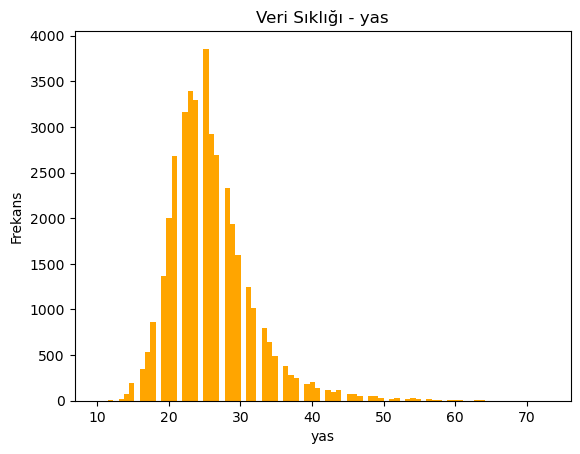

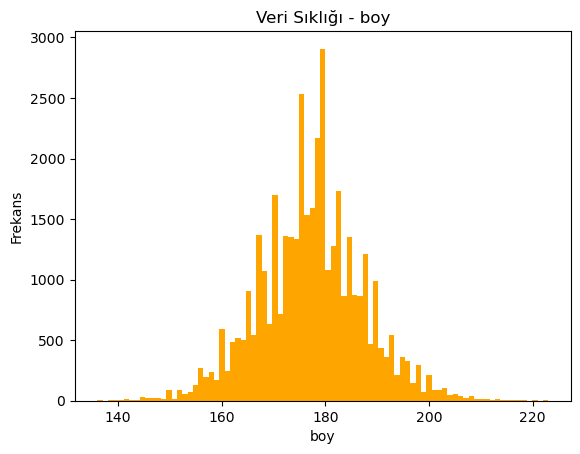

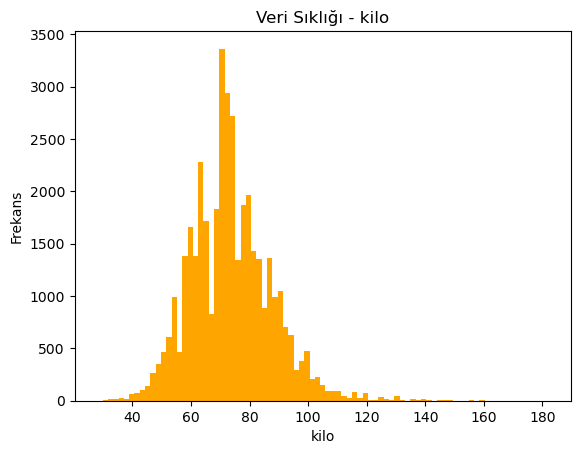

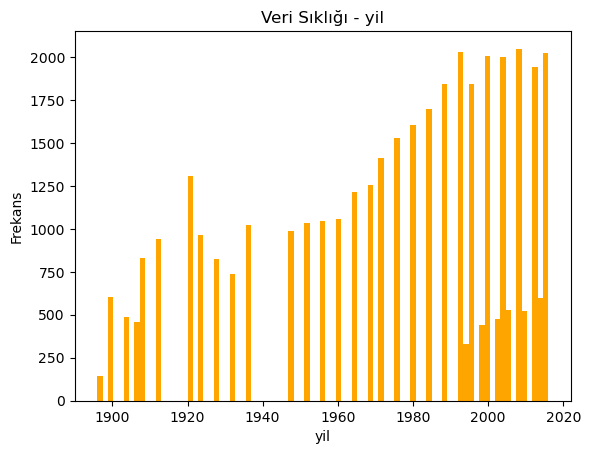

In [20]:
# sayısal değişkenler için histogram çizdirelim
sayisal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayisal_degisken:
    plotHistogram(i)

* Beklenildiği gibi yaş, kilo ve boy sütunlarında normal dağılıma yakın bir dağılım söz konusu.
* Yıl sütununda ise ilk olarak göze çarpan son yüzyılda gerçekleşen savaş zamanlarında olimpiyatların yapılmadığı ve son 20 yılda olimpiyatların eski yıllara göre daha çok yapıldığıdır.

In [21]:
# veri içerisinde bulunan sayısal değerleri istatistiksel açıdan inceleyelim
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yas,39783.0,25.918456,5.859569,10.0,22.0,25.00,29.0,73.0
boy,39783.0,177.337864,10.169900,136.0,170.0,177.48,184.0,223.0
kilo,39783.0,73.751840,13.976279,28.0,64.0,73.00,82.0,182.0
yil,39783.0,1973.943845,33.822857,1896.0,1952.0,1984.00,2002.0,2016.0


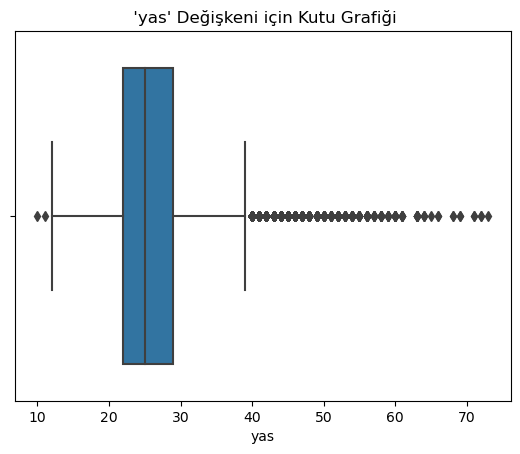

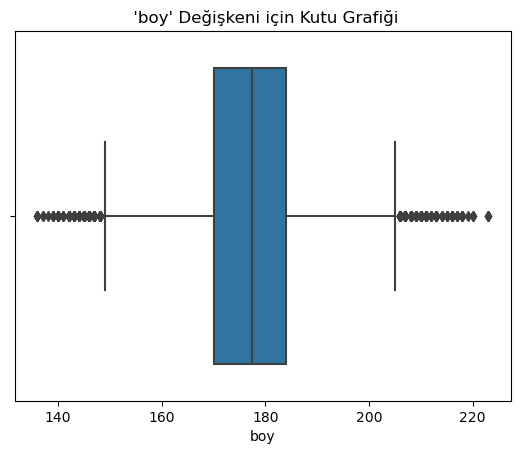

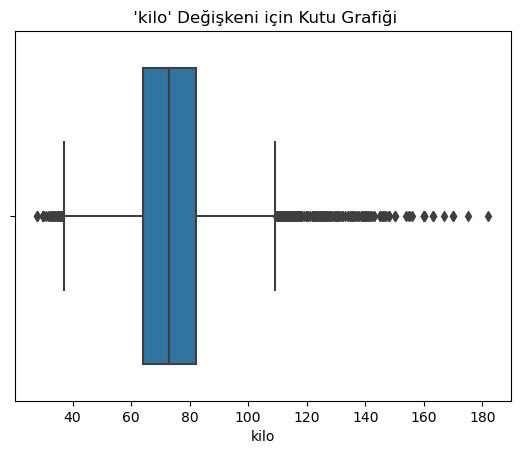

In [22]:
# yıl dışında kalanlar için box plot çizdirelim
sayisal_degisken2 = ["yas", "boy", "kilo"]
for i in sayisal_degisken2:
    sns.boxplot(data[i], data = data)
    plt.title(f" '{i}' Değişkeni için Kutu Grafiği")
    plt.xlabel(f"{i}")
    plt.show()

#### Kategorik Değişkenler
* Veri içerisinde 9 adet kategorik değişken bulunmaktadır. Bunlar:
    1. isim
    1. cinsiyet
    1. takim
    1. noc
    1. sezon
    1. sehir
    1. spor
    1. etkinlik
    1. madalya
* Kategorik değişkenleri incelemek ve yorumlamak için bar grafiklerini kullanacağız.

In [23]:
# öncelikli olarak bar grafiğini elde edeceğimiz metodumuzu yazalım.
def plotBar(degisken,n = 10):

    veri_ = data[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))
    

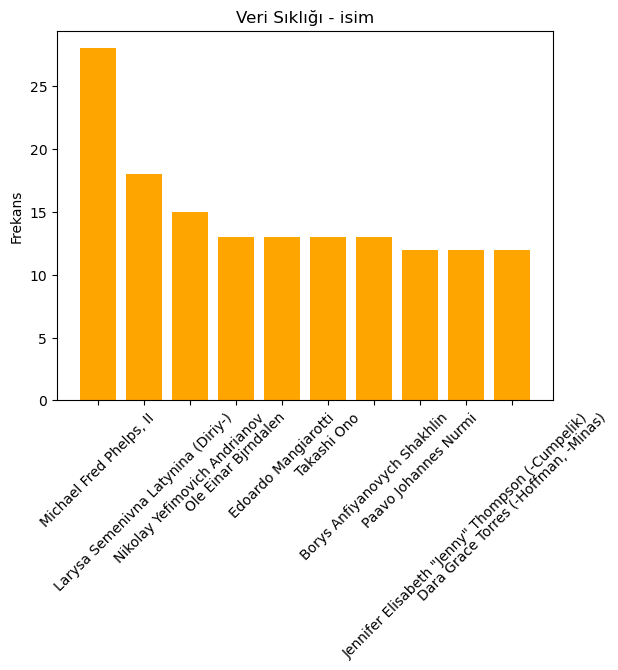

isim: 
 Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Ole Einar Bjrndalen                                13
Edoardo Mangiarotti                                13
Takashi Ono                                        13
Borys Anfiyanovych Shakhlin                        13
Paavo Johannes Nurmi                               12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Dara Grace Torres (-Hoffman, -Minas)               12
Name: isim, dtype: int64


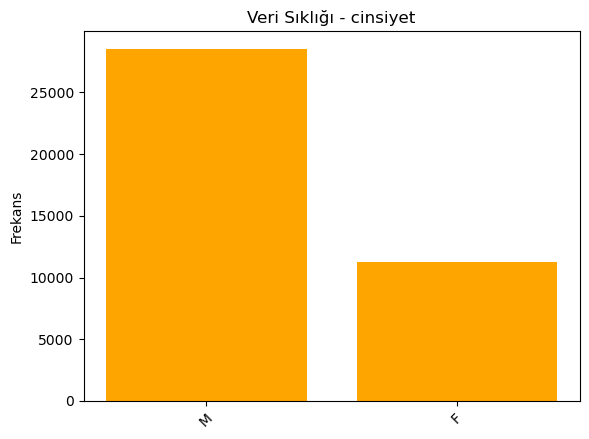

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


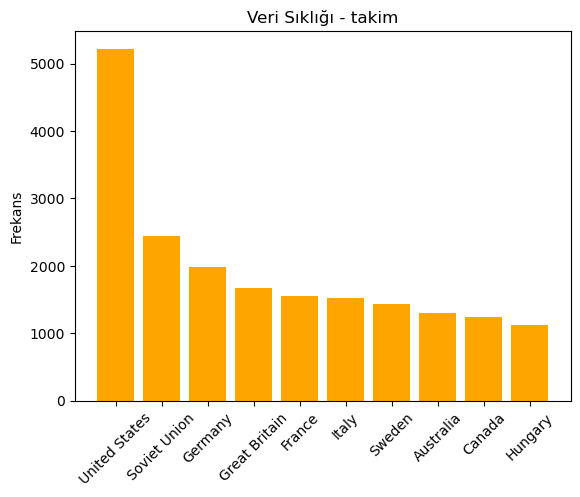

takim: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: takim, dtype: int64


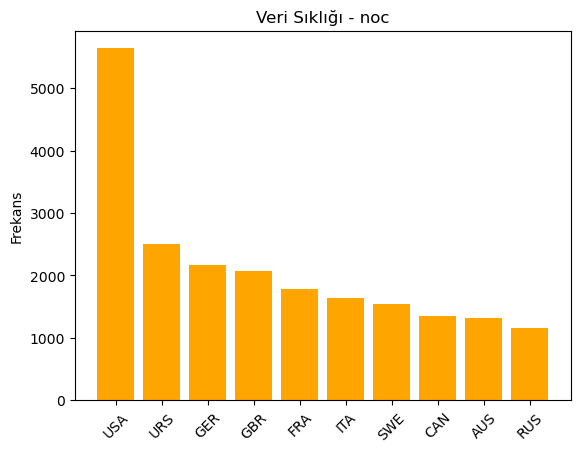

noc: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: noc, dtype: int64


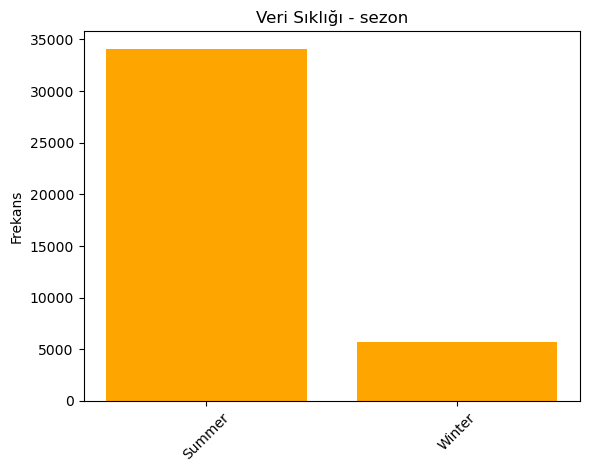

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


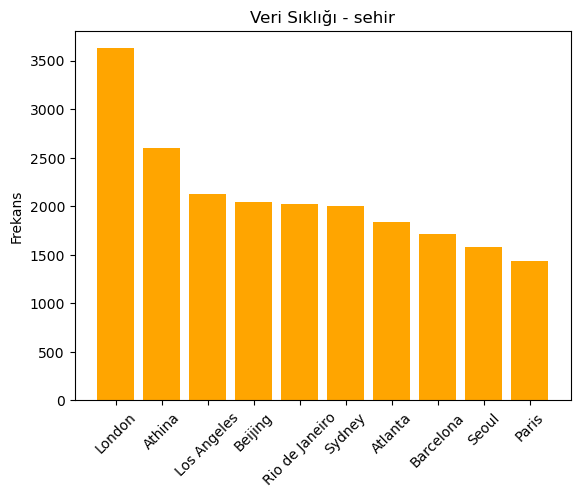

sehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Sydney            2004
Atlanta           1842
Barcelona         1712
Seoul             1582
Paris             1436
Name: sehir, dtype: int64


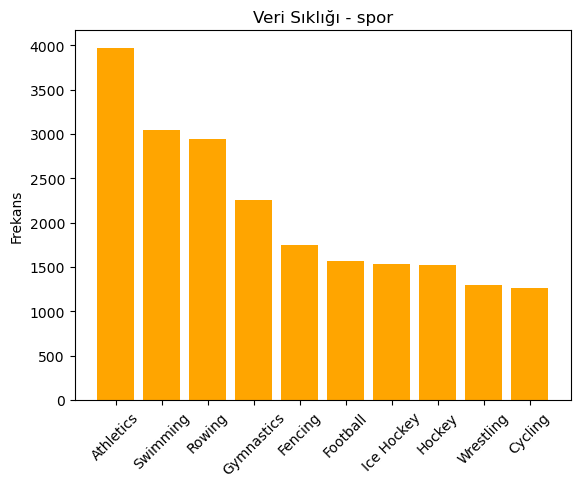

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Football      1571
Ice Hockey    1530
Hockey        1528
Wrestling     1296
Cycling       1263
Name: spor, dtype: int64


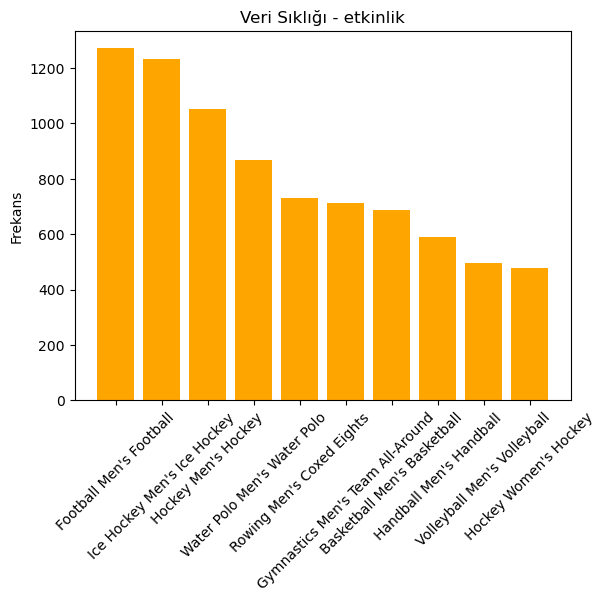

etkinlik: 
 Football Men's Football             1269
Ice Hockey Men's Ice Hockey         1230
Hockey Men's Hockey                 1050
Water Polo Men's Water Polo          866
Rowing Men's Coxed Eights            730
Gymnastics Men's Team All-Around     713
Basketball Men's Basketball          687
Handball Men's Handball              588
Volleyball Men's Volleyball          495
Hockey Women's Hockey                478
Name: etkinlik, dtype: int64


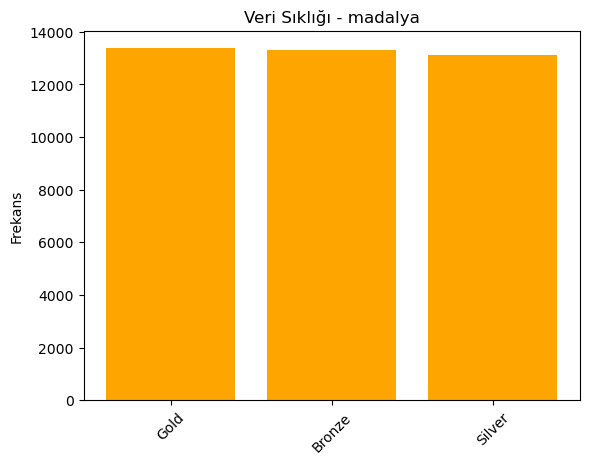

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [24]:
# sayısal değişkenler için histogram çizdirelim
kategorik_degisken = ["isim", "cinsiyet", "takim", "noc", "sezon", "sehir", "spor", "etkinlik", "madalya"]
for i in kategorik_degisken:
    plotBar(i)

Çıkarımlar:
* Olimpiyat tarihi boyunca en çok madalya kazanan isim Micheal Phelps'dir.
* Kadın ve erkek yarışmacılar arasında yaklaşık 1:2 oranı görülmektedir.
* Takımlar olarak en çok ABD katılmıştır.
* Beklendiği gibi noc ve takım çıktıları aynıdır.
* Yaz sezonunda düzenlenen olimpiyat sayısı kış sezonunda düzenlenenden fazladır.
* Olimpiyatlar en çok Londra'da düzenlenmiştir.
* Olimpiyatlarda en çok atletizm branşında yarışılmıştır.
* Erkekler futbol müsabakaları en çok yapılan etkinliktir.
* Verilen madalyaların aynı çıkmasını beklerken, farklılık olduğu görülmektedir.

### İki Değişkenli Veri Analizi
* İki değişkenli veri analizi yaparken kazanılan madalyalar ve diğer sütunlar arasında bulunan ilişkileri inceleyeceğiz.
    1. Cinsiyete göre boy ve kilo karşılaştırması
    1. Saysal sütunlar arasında ilişkinin incelenmesi
    1. Madalya ve yaş arasındaki ilişkinin incelenmesi
    1. Takımların kazandıkları altın, gümüş ve bronz madalya sayıları
    1. Kazanılan madalyaların hangi şehirlerde kazanıldığı
    1. Cinsiyete göre kazanılan altın, gümüş ve bronz madalya sayıları
    1. Tüm ülkeleri Olimpiyatlara ilk katıldıkları yıla göre sıralayıp ilk 10 ülkeyi getirin
* Görselleştirme bölümünde farklı görselleştirme teknikleri kullanılarak veri analizine devam edilecektir.    

#### 1) Cinsiyete Göre Boy ve Kilo Karşılaştırması

In [25]:
erkek = data[data.cinsiyet == "M"]
erkek.head()

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [26]:
kadin = data[data.cinsiyet == "F"]
kadin.head()

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


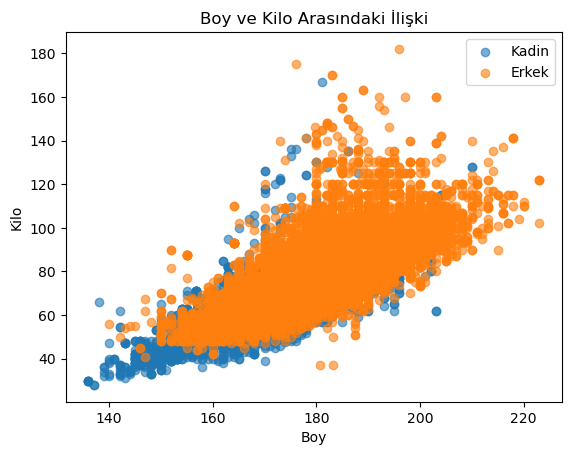

In [27]:
# kadın ve erkek'ler arasında boy ilişkisine bakalım
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.6, label = "Kadin")
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.6, label = "Erkek")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

* Boy ve kilo arasında pozitif ilişki olduğunu anlıyoruz.

#### 2) Sayısal Sütunlar Arasında İlişki İncelemesi

In [28]:
# sayisal veriler arasında ilişki incelemesi
data.loc[:,["yas","boy","kilo"]].corr() # korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.06204,0.137607
boy,0.062040,1.00000,0.794290
kilo,0.137607,0.79429,1.000000


* Bir önceki grafikte gördüğümüz boy ve kilo arasında pozitif ilişki durumunu, korelasyon tablosunda da görebiliyoruz.

#### 3) Madalya ve Yaş Arasındaki İlişki

In [29]:
# altin, gümüş ve bronz olacak şekilde 3 farklı gruba ayıralım.(get_dummies)
veri_gecici = data.copy()              # verinin orjinali bozulmasın diye kopyalayalım 
veri_gecici = pd.get_dummies(veri_gecici, columns=['madalya'])    # kategori sayısına bağlı olarak get_dummies ile 
veri_gecici.head(3)                                               # dummy variable formatına çevririyoruz                  

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [32]:
veri_gecici.loc[:,["yas","madalya_Bronze", "madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


#### 4) Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları

In [33]:
veri_gecici[["takim","madalya_Gold","madalya_Silver","madalya_Bronze"]].groupby(["takim"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,takim,madalya_Gold,madalya_Silver,madalya_Bronze
462,United States,2474.0,1512.0,1233.0
403,Soviet Union,1058.0,716.0,677.0
165,Germany,679.0,627.0,678.0
215,Italy,535.0,508.0,484.0
171,Great Britain,519.0,582.0,572.0
149,France,455.0,518.0,577.0
420,Sweden,451.0,476.0,507.0
198,Hungary,432.0,330.0,365.0
67,Canada,422.0,413.0,408.0
117,East Germany,369.0,309.0,263.0


#### 5) Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı

In [35]:
veri_gecici[["sehir","madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby(["sehir"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,sehir,madalya_Gold,madalya_Silver,madalya_Bronze
17,London,1215.0,1195.0,1214.0
3,Athina,883.0,859.0,860.0
18,Los Angeles,726.0,691.0,706.0
6,Beijing,671.0,667.0,710.0
27,Rio de Janeiro,665.0,655.0,703.0
38,Sydney,663.0,661.0,680.0
4,Atlanta,608.0,605.0,629.0
5,Barcelona,559.0,549.0,604.0
33,Seoul,520.0,513.0,549.0
2,Antwerpen,493.0,448.0,367.0


#### 6) Cinsiyete Göre Kazanılan Altın, Gümüş ve Bronz Madalya Sayıları

In [36]:
veri_gecici[["cinsiyet","madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby(["cinsiyet"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,cinsiyet,madalya_Gold,madalya_Silver,madalya_Bronze
1,M,9625.0,9381.0,9524.0
0,F,3747.0,3735.0,3771.0


#### 7) Tüm ülkeleri Olimpiyatlara ilk katıldıkları yıla göre sıralayıp ilk 10 ülkeyi getirin

In [42]:
veri_gecici.noc.value_counts()

USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
       ... 
IRQ       1
GUY       1
JOR       1
BOT       1
TGA       1
Name: noc, Length: 149, dtype: int64

In [46]:
veri_gecici.groupby(["noc"])[["yil"]].min().sort_values(by = "yil").head(10)

,yil
noc,
GRE,1896
GER,1896
DEN,1896
SUI,1896
USA,1896
AUT,1896
HUN,1896
FRA,1896
GBR,1896


### Çok Değişkenli Veri Analizi

#### Pivot Tablosu
* Pivot tablo, veritabanı, iş zekası programı ya da veri tablosu gibi, daha geniş bir tabloyu özetleyen istatistik tablosudur. Bu özet, pivot tabloyu anlamlı bir şekilde gruplayan toplamları, ortalamaları veya diğer istatistikleri içerebilir.

In [145]:
veri_pivot = data.pivot_table(index="madalya", columns = "cinsiyet",
                 values=["boy","kilo","yas"], 
                aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min, max, np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003455  180.046978  62.758422  77.856463  69.0  72.0  12.0   
Gold      170.449103  180.320728  63.201297  78.207376  63.0  64.0  13.0   
Silver    170.233973  180.055230  62.868179  77.979809  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

* Bu tabloda farklı madalyalar ve cinsiyetler için boy ve kilo parametrelerinin ortalama yaş parametresinin ise maksimum, minimum ve standart sapmasını görebiliyoruz.

## Aykırı Değer
* Aykırı değer, diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır. Bir aykırı değer, ölçümdeki değişkenliğe bağlı olabilir veya deneysel hatayı gösterebilir. Ayrıca aykırı değer istatistiksel analizlerde ciddi sorunlara neden olabilir.


In [146]:
from collections import Counter

def anomaliTespiti(df,ozellik):
    outlier_indices = []
    
    for c in ozellik:
        # 1. çeyrek
        Q1 = np.percentile(df[c],25)
        # 3. çeyrek
        Q3 = np.percentile(df[c],75)
        # IQR: Çeyrekler açıklığı
        IQR = Q3 - Q1
        # aykırı tespiti için çarpan
        outlier_step = IQR * 1.5
        # aykırıyı ve aykırı indeksini tespit et
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # indeksleri depola
        outlier_indices.extend(outlier_list_col)
    
    # eşsiz aykırı değerleri bul
    outlier_indices = Counter(outlier_indices)
    # eğer bir örnek (v) 1 farklı sütun için aykırı değerse bunu aykırı olarak kabul et (v>1)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [149]:
veri_anomali = data.loc[anomaliTespiti(data,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

* Anamolinin en çok görüldüğü spor branşları yukarıdaki gibidir.

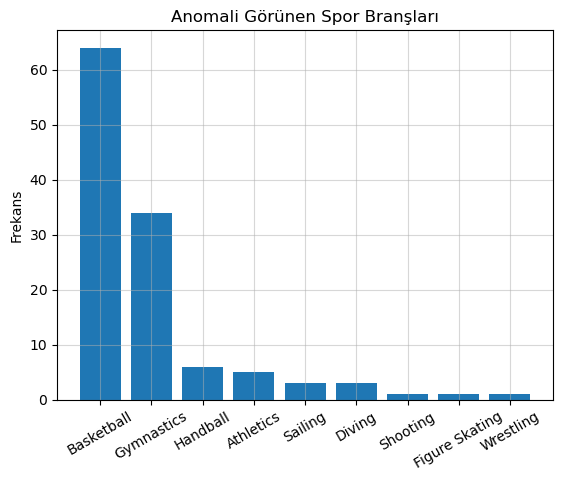

In [150]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Anomali Görünen Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True,alpha = 0.5)
plt.show()

In [153]:
# Jimnastikte meydana gelen anomali nedeni
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym.head(10)

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [152]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

* Jimnastikte meydana gelen anomali sonucunda veriyi incelediğimizde anomalinin nedeni sporcuların yaşlarının küçük ve kilolarının az olmasından kaynaklıdır.
* Ayrıca jimnastikte meydana gelen anomalilerin hepsi kadın sporcular tarafından gerçekleşmiştir.

In [155]:
# Basketbol da meydana gelen anomali nedeni
veri_basket = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basket.head()

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [38]:
veri_basket.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

* Basketbol oynayan erkek oyuncuların boylarının uzun ve kilolarının fazla olmasından kaynaklı anomali tespit edilmiştir. 

<a id='7'></a>
## Zaman Serilerinde Veri Analizi
* Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi
* Yıllara Göre Madalya Sayıları

In [173]:
veri_zaman = data.copy()           # verinin orjinali bozulmasın diye kopyalayalım
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [174]:
# olimpiyatların gerçekleştiği eşsiz yılları bulalım
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [175]:
# yılları küçükten büyüğe sıralayalım
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

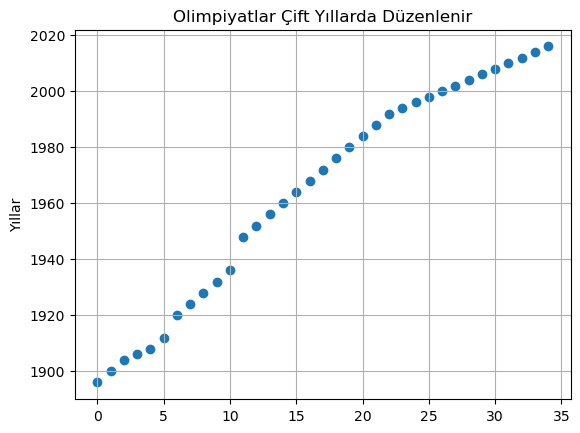

In [176]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [177]:
# veri içerisinde bulunan yılları datetime veri tipine dönüştürelim
tarih_saat_nesnesi = pd.to_datetime(veri_zaman['yil'], format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head()

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
40   2014-01-01
41   1948-01-01
Name: yil, dtype: datetime64[ns]

In [178]:
# veriye tarih saat diye yeni bir sütun açıp, bir önceki satırda elde ettiğimiz datatime veri tipini ekleyelim.
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,noc,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014-01-01
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948-01-01


In [179]:
# tarih_saat sütununda bulunan datetime veri tipine ait veriyi, asıl verinin indeksi yapalım
# pandas kütüphanesinde indeksi datetime veri tipi olan veri setleri ile çalışmak için özel yapılar bulunmaktadır.

veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis = 1,inplace= True)
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,noc,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


### Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi

In [180]:
periyodik_veri = veri_zaman.resample("2A").mean()        # 2 yıllık periyotlar halinde ortalama değerleri al
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.294056,72.814336
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.907235,75.145083
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.244753,74.416461


In [182]:
# kayıp verileri çıkart
periyodik_veri.dropna(axis=0,inplace = True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.294056,72.814336
1900-12-31,27.786689,177.907235,75.145083
1904-12-31,26.363868,177.244753,74.416461
1906-12-31,26.479389,176.366048,74.172140
1908-12-31,27.566739,176.665836,73.798339


<Figure size 640x480 with 0 Axes>

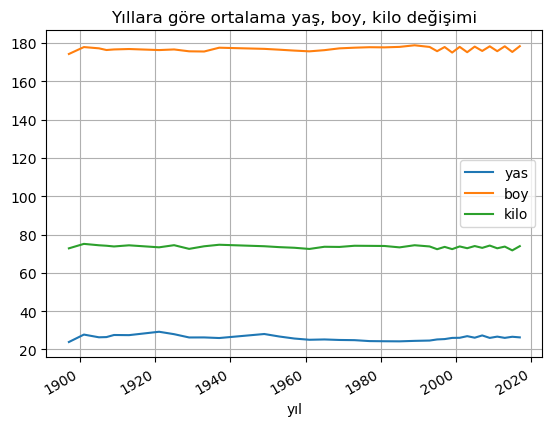

In [183]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara göre ortalama yaş, boy, kilo değişimi")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

### Yıllara Göre Madalya Sayıları

In [184]:
veri_zaman = pd.get_dummies(veri_zaman, columns=['madalya'])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,noc,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [193]:
periyodik_veri = veri_zaman.resample("2A").sum()    # 2 yıllık periyotlar halinde ortalama değerleri al
periyodik_veri.head()
# kayıp verileri çıkart
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24924.05,10412.45,38.0,62.0,43.0
1900-12-31,16783.16,107455.97,45387.63,175.0,201.0,228.0
1904-12-31,12812.84,86140.95,36166.40,150.0,173.0,163.0
1906-12-31,12127.56,80775.65,33970.84,145.0,157.0,156.0
1908-12-31,22907.96,146809.31,61326.42,256.0,294.0,281.0


<Figure size 640x480 with 0 Axes>

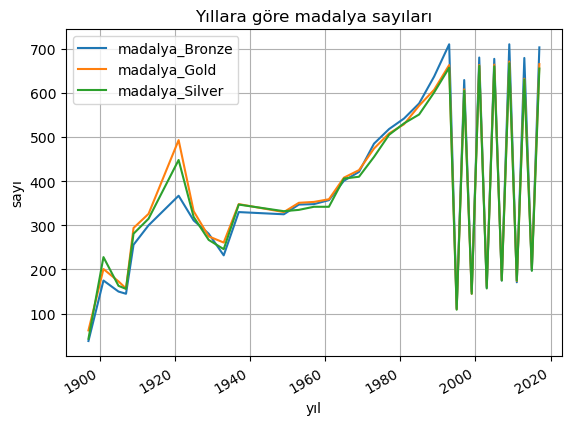

In [186]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

* Yukarıdaki şekilde görüldüğü gibi 2000'li yıllardan sonra madalya sayılarındaki dalgalanmalar fazla oluyor. Bunun nedeni yaz ve kış olimpiyatlarında yapılan etkinlik sayısının ve buna karşılık gelen madalya sayısının farklılık göstermesidir.

### Yıllara ve Sezonlara Göre Madalya Sayıları

In [188]:
# veriyi yaz ve kış olmak üzere 2 ye ayıralım
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,noc,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [194]:
# kış için
periyodik_veri_kis = kis.resample("2A").sum()    # 2 yıllık periyotlar halinde ortalama değerleri al

# kayıp verileri çıkart
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22869.92,9716.78,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [199]:
# yaz için
periyodik_veri_yaz = yaz.resample("2A").sum() # 2 yıllık periyotlar halinde ortalama değerleri al

# kayıp verileri çıkart
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24924.05,10412.45,38.0,62.0,43.0
1900-12-31,16783.16,107455.97,45387.63,175.0,201.0,228.0
1904-12-31,12812.84,86140.95,36166.40,150.0,173.0,163.0
1906-12-31,12127.56,80775.65,33970.84,145.0,157.0,156.0
1908-12-31,22907.96,146809.31,61326.42,256.0,294.0,281.0


<Figure size 640x480 with 0 Axes>

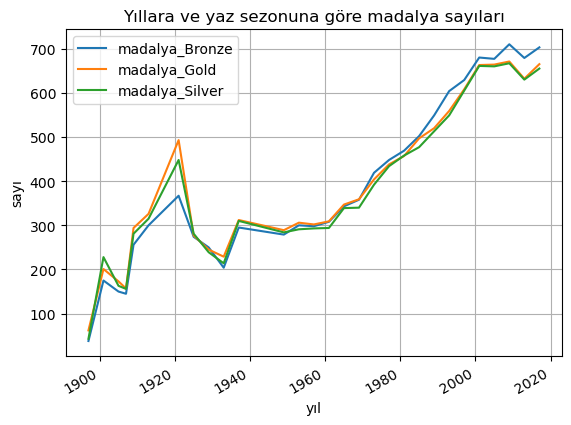

<Figure size 640x480 with 0 Axes>

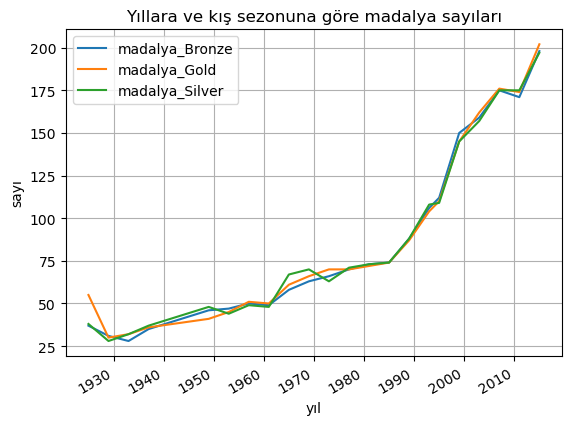

In [200]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara ve yaz sezonuna göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara ve kış sezonuna göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()